In [1]:
import blur
import matplotlib.pyplot as plt


File accessed:  hico_data/H2010342050003.L1B_ISS.nc
Frozen({'Lt': <xarray.Variable (scan_lines: 2000, samples: 512, bands: 128)> Size: 524MB
[131072000 values with dtype=float32]
Attributes:
    units:             W/m^2/micrometer/sr
    long_name:         HICO Top of Atmosphere
    wavelength_units:  nanometers
    fwhm:              [ 5.  5.  5. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 1...
    wavelengths:       [ 352.528    358.256    363.98398  369.712    375.44  ...})


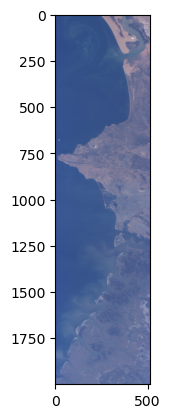

Initial fwhm:  1.1771771771771768
Band index:  9
Desired fwhm:  3.5
Initial fwhm:  1.7587587587587579
Band index:  10
Desired fwhm:  3.408058409951325
Initial fwhm:  1.5905905905905904
Band index:  11
Desired fwhm:  3.318280151433207
Initial fwhm:  1.3803803803803798
Band index:  12
Desired fwhm:  3.230665224445646
Initial fwhm:  1.3663663663663668
Band index:  13
Desired fwhm:  3.1452136289886425
Initial fwhm:  1.4294294294294287
Band index:  14
Desired fwhm:  3.061925365062196
Initial fwhm:  1.3523523523523524
Band index:  15
Desired fwhm:  2.9808004326663062
Initial fwhm:  1.4504504504504494
Band index:  16
Desired fwhm:  2.9018388318009736
Initial fwhm:  1.471471471471471
Band index:  17
Desired fwhm:  2.825040562466198
Initial fwhm:  1.4574574574574575
Band index:  18
Desired fwhm:  2.7504056246619797
Initial fwhm:  1.443443443443443
Band index:  19
Desired fwhm:  2.677934018388318
Initial fwhm:  1.4714714714714714
Band index:  20
Desired fwhm:  2.6076257436452135
Initial fwhm:  1

In [2]:
ba = blur.blurCube()

ba.get_cube()

ba.read_cube()

ba.visualize_cube()

#ba.blur_cube()

#ba.plot_edge_fwhm()

#print(ba.sigma_values)
